# Life_Expectancy Analysis

### Loading the Data

In [1]:
import pandas as pd

# Load the data
data = pd.read_csv(r"C:\Users\Raymond\Desktop\Life_Expectancy\data.csv")

# Display the first few rows of the dataframe to understand its structure and content
data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Description of the Data

The dataset appears to be focused on various factors affecting life expectancy across different countries and years. It includes the following columns:

1. Country: The name of the country.
2. Year: The year of the data record.
3. Status: Whether the country is Developing or Developed.
4. Life expectancy: The average life expectancy in years.
5. Adult Mortality: The adult mortality rate.
6. Infant deaths: Number of infant deaths per 1000 population.
7. Alcohol: Per capita alcohol consumption.
8. Percentage expenditure: Government expenditure on health as a percentage.
9. Hepatitis B: Percentage of people vaccinated against Hepatitis B.
10. Measles: Number of reported cases of measles per 1000 population.
11. BMI: Average Body Mass Index.
12. Under-five deaths: Number of deaths under five years old per 1000 population.
13. Polio: Percentage of people vaccinated against Polio.
14. Total expenditure: Total expenditure on health as a percentage of GDP.
15. Diphtheria: Percentage of people vaccinated against Diphtheria.
16. HIV/AIDS: Deaths per 1000 live births due to HIV/AIDS.
17. GDP: Gross Domestic Product per capita.
18. Population: Population of the country.
19. Thinness 1-19 years: Prevalence of thinness among children aged 1-19 years.
20. Thinness 5-9 years: Prevalence of thinness among children aged 5-9 years.
21. Income composition of resources: Human Development Index in terms of income composition.
22. Schooling: Number of years of schooling.

## Potential Insights

1. Life Expectancy Trends: Analyze how life expectancy has changed over time across different countries and regions.
2. Health Expenditure Impact: Assess the relationship between health expenditure and life expectancy.
3. Vaccination Impact: Explore the effect of vaccination rates (Hepatitis B, Polio, Diphtheria) on life expectancy and child mortality rates.
4. Economic Factors: Evaluate how GDP and economic status (Developing vs. Developed) influence life expectancy.
5. Disease Impact: Investigate the impact of diseases (HIV/AIDS, Measles) on life expectancy.
6. Nutrition and Education: Examine the role of nutrition (BMI, thinness) and education (schooling years) on life expectancy.

##  Data Cleaning and Processing

In [3]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [4]:
# Check data types of each column
data_types = data.dtypes

data_types


Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [5]:
# Calculate the number of rows with any missing values
rows_with_missing_values = data.isnull().any(axis=1).sum()

# Calculate the total number of rows
total_rows = data.shape[0]

rows_with_missing_values, total_rows, (rows_with_missing_values / total_rows) * 100


(1289, 2938, 43.87338325391423)

In [6]:
# Impute missing values with the mean for numerical columns
data_imputed = data.copy()

for column in data_imputed.columns:
    if data_imputed[column].dtype in ['float64', 'int64']:
        data_imputed[column].fillna(data_imputed[column].mean(), inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = data_imputed.isnull().sum().sum()

missing_values_after_imputation


0

In [7]:
data_imputed.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# Exploratory Data Analysis (EDA)

In [11]:
# Summary statistics
data_imputed.describe()


,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.938190,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.507640,124.080302,117.926501,3.916288,1987.914858,22.586855,11467.272489,19.927677,160.445548,23.352143,2.400274,23.640073,5.077785,13136.800417,5.381546e+07,4.394535,4.482708,0.204820,3.264381
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.200000,74.000000,0.000000,1.092500,4.685343,80.940461,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,2008.000000,72.000000,144.000000,3.000000,4.160000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.938190,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.662000,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7483.158469,1.275338e+07,7.100000,7.200000,0.772000,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


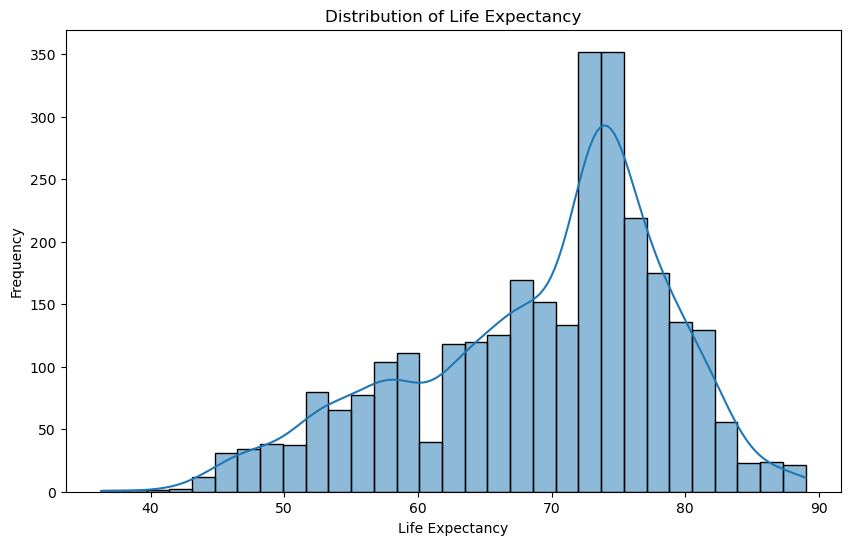

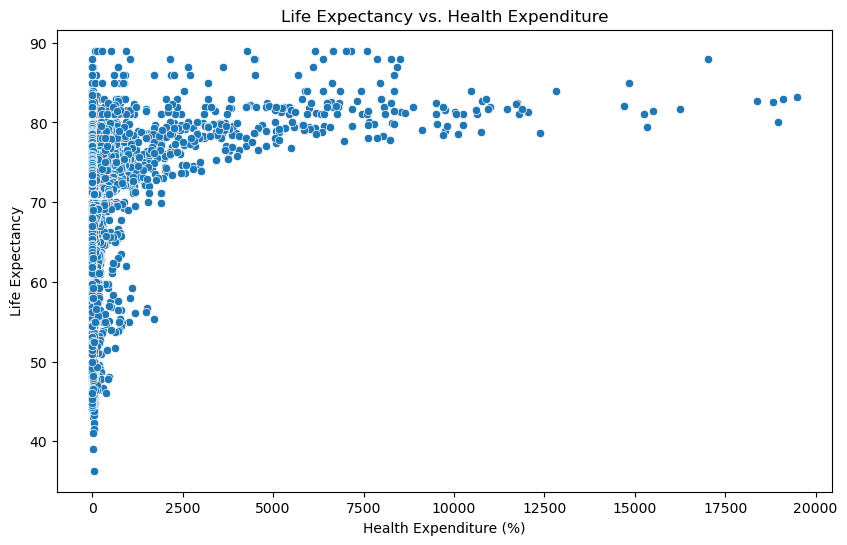

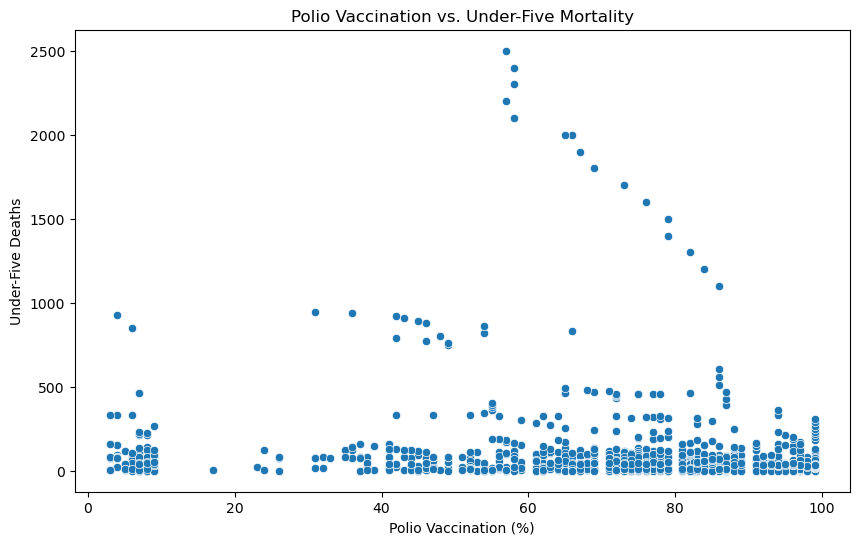

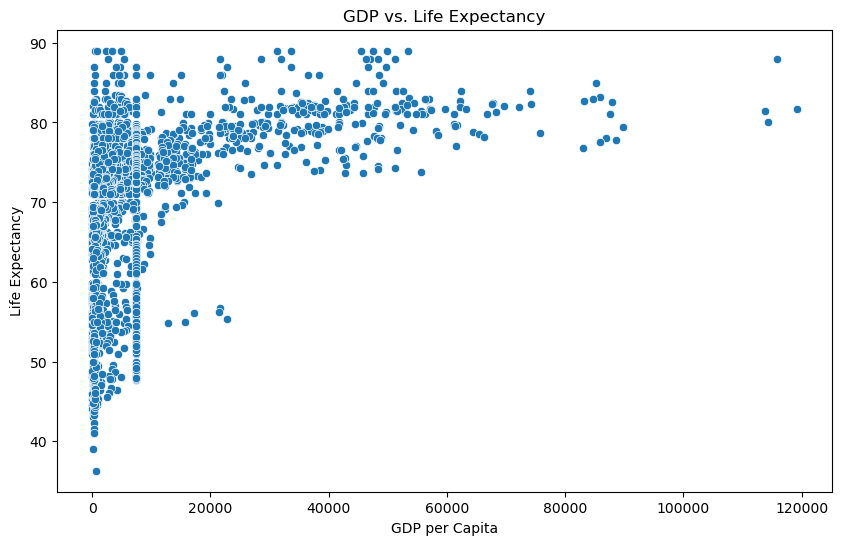

NameError: name 'top_countries_data' is not defined

In [15]:
# Life Expectancy distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_imputed['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

# Relationship between Life Expectancy and Health Expenditure
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='percentage expenditure', y='Life expectancy ')
plt.title('Life Expectancy vs. Health Expenditure')
plt.xlabel('Health Expenditure (%)')
plt.ylabel('Life Expectancy')
plt.show()

# Impact of Vaccination on Mortality Rates
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='Polio', y='under-five deaths ')
plt.title('Polio Vaccination vs. Under-Five Mortality')
plt.xlabel('Polio Vaccination (%)')
plt.ylabel('Under-Five Deaths')
plt.show()

# GDP vs. Life Expectancy
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='GDP', y='Life expectancy ')
plt.title('GDP vs. Life Expectancy')
plt.xlabel('GDP per Capita')
plt.ylabel('Life Expectancy')
plt.show()

# Calculating average years of schooling for top expenditure countries
avg_schooling_top = top_countries_data.groupby('Country')['Schooling'].mean().sort_values(ascending=False)

# Setting up the bar plot for Schooling
plt.figure(figsize=(14, 7))
sns.barplot(x=avg_schooling_top.index, y=avg_schooling_top.values, palette="magma")
plt.title('Average Years of Schooling for Top 10 Countries by Health Expenditure')
plt.xlabel('Country')
plt.ylabel('Average Years of Schooling')
plt.xticks(rotation=45)
plt.show()



<Figure size 1200x800 with 0 Axes>

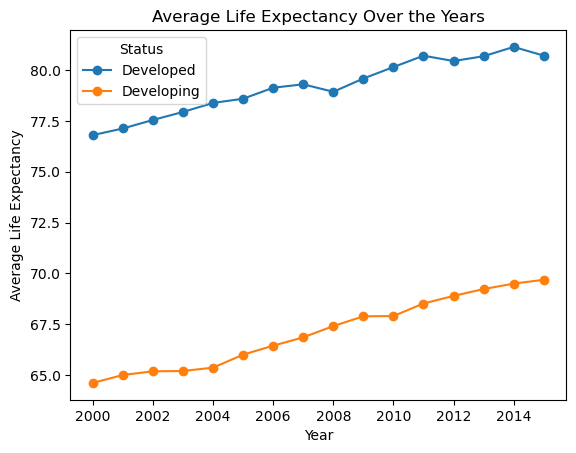

In [16]:
# Time Series Analysis: Trends in Life Expectancy over the Years

# Average life expectancy per year for Developed and Developing countries
avg_life_expectancy_year = data_imputed.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack()

# Plotting the trends
plt.figure(figsize=(12, 8))
avg_life_expectancy_year.plot(marker='o')
plt.title('Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')

plt.show()


In [14]:
# Disease Impact Analysis: HIV/AIDS and Measles

# Scatter plot and correlation for HIV/AIDS
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x=' HIV/AIDS', y='Life expectancy ')
plt.title('HIV/AIDS vs. Life Expectancy')
plt.xlabel('HIV/AIDS (deaths per 1000 live births)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot and correlation for Measles
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='Measles ', y='Life expectancy ')
plt.title('Measles vs. Life Expectancy')
plt.xlabel('Measles (cases per 1000 population)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Correlation coefficients for disease impact
correlation_hiv = data_imputed[' HIV/AIDS'].corr(data_imputed['Life expectancy '])
correlation_measles = data_imputed['Measles '].corr(data_imputed['Life expectancy '])

# Nutrition and Education Analysis: BMI, Thinness, and Schooling

# Scatter plot and correlation for BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x=' BMI ', y='Life expectancy ')
plt.title('BMI vs. Life Expectancy')
plt.xlabel('BMI')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot and correlation for Thinness 1-19 years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x=' thinness  1-19 years', y='Life expectancy ')
plt.title('Thinness 1-19 Years vs. Life Expectancy')
plt.xlabel('Thinness 1-19 Years')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot and correlation for Thinness 5-9 years
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x=' thinness 5-9 years', y='Life expectancy ')
plt.title('Thinness 5-9 Years vs. Life Expectancy')
plt.xlabel('Thinness 5-9 Years')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Scatter plot and correlation for Schooling
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_imputed, x='Schooling', y='Life expectancy ')
plt.title('Schooling vs. Life Expectancy')
plt.xlabel('Schooling (years)')
plt.ylabel('Life Expectancy')
plt.grid(True)
plt.show()

# Correlation coefficients for nutrition and education impact
correlation_bmi = data_imputed[' BMI '].corr(data_imputed['Life expectancy '])
correlation_thinness_1_19 = data_imputed[' thinness  1-19 years'].corr(data_imputed['Life expectancy '])
correlation_thinness_5_9 = data_imputed[' thinness 5-9 years'].corr(data_imputed['Life expectancy '])
correlation_schooling = data_imputed['Schooling'].corr(data_imputed['Life expectancy '])

(correlation_hiv, correlation_meas


SyntaxError: incomplete input (1356841505.py, line 69)

C:\Users\Raymond\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


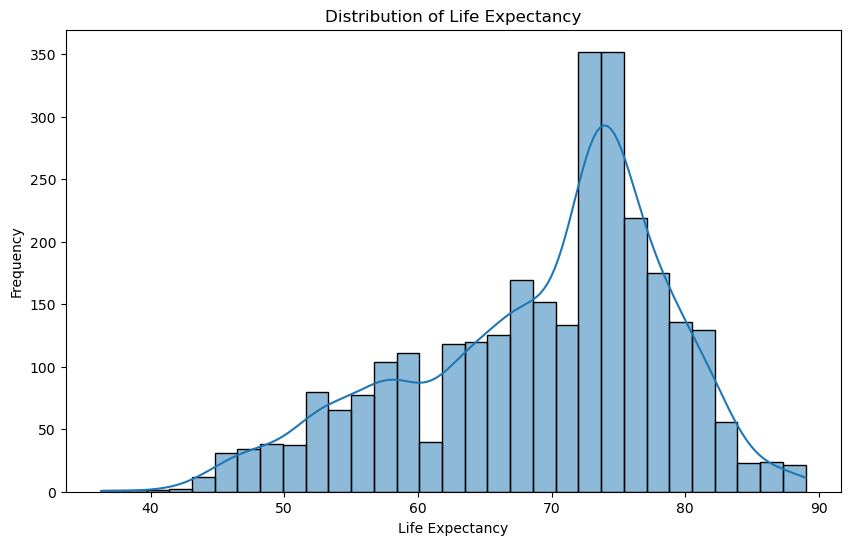

<Figure size 1200x800 with 0 Axes>

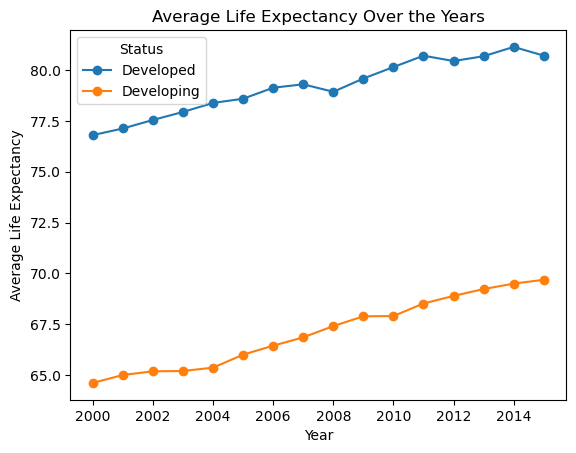

In [17]:
# Life Expectancy distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_imputed['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


# Time Series Analysis: Trends in Life Expectancy over the Years

# Average life expectancy per year for Developed and Developing countries
avg_life_expectancy_year = data_imputed.groupby(['Year', 'Status'])['Life expectancy '].mean().unstack()

# Plotting the trends
plt.figure(figsize=(12, 8))
avg_life_expectancy_year.plot(marker='o')
plt.title('Average Life Expectancy Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.legend(title='Status')

plt.show()


SyntaxError: incomplete input (1356841505.py, line 69)